<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Machine-Learning-Projects/blob/master/Credit_Card_Fraud_DetectionV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount my Google Drive where the dataset resides...

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Set up the programming enviroment

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import pandas as pd
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Using TensorFlow backend.


## Get the data...


Specify the directory path where the data is located...

In [0]:
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detection/creditcard.csv')

Info about each of the attributes. 



In [0]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [0]:
raw_data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


### Check for any missing data and we find that there are none.  Good!

In [0]:
raw_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Let's look at the data metrics for training samples classified as 'fraudulent'

In [0]:
fraud = np.where(raw_data['Class']==1)
non_fraud = np.where(raw_data['Class']==0)

### Statistics for the fraudulent transactions...

In [0]:
raw_data.iloc[fraud].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


### Statistics for the non-fraudulent transactions...

In [0]:
raw_data.iloc[non_fraud].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


### Our model's minimum accuracy has to be $(1 - \frac{492}{284315}) = 99.83\%$

### Let's visualize the correlation of each independent variable with the target variable 'Class'.

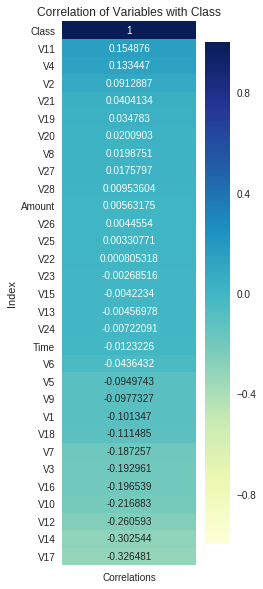

In [0]:
import seaborn as sns

corr = raw_data.corrwith(raw_data['Class']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(3,10))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

### Assign the 'Class' column as 'y' and rest of the columns as 'X'

In [0]:
y = raw_data['Class']
X = raw_data.drop('Class',axis=1)

### Let's standardize X by subtracting the mean and dividing by the variance. **This function transforms X into  a numpy array.**

In [0]:
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler().fit_transform(X)

### Now we need to set aside 10% of the dataset as our test set. Use the 'train_test_split' routine from sklearn to do this.

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.1, random_state=42)

### Let's get some probability distribution plots to ensure our standardization worked.

In [0]:
def plotmydata(X,sigma,mu,i):
  
  #Create dataframe
  
  num_bins = 250
  
  fig, ax = plt.subplots()
  n, bins, patches = ax.hist(X,num_bins,density=1)
 
  # add a 'best fit' line
  y = ((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*(1/sigma*(bins - mu))**2))
  plt.axis([-5, 5, 0, 1.5])
  ax.plot(bins, y, '--')
  ax.set_xlabel('Standardized Values')
  ax.set_ylabel('Probability density')
  ax.set_title('Histogram of Standardized Values - Column V'+str(i))

  # Tweak spacing to prevent clipping of ylabel
  fig.tight_layout()
  plt.show()
  return

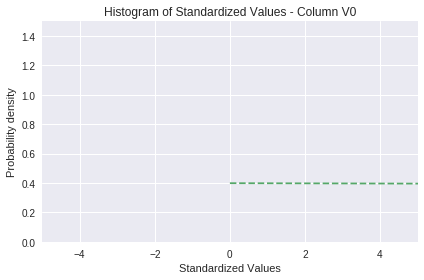

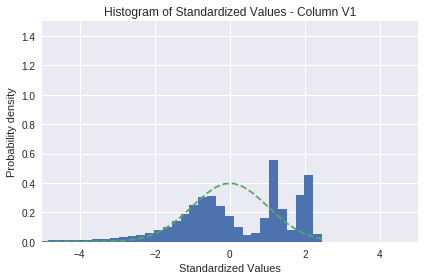

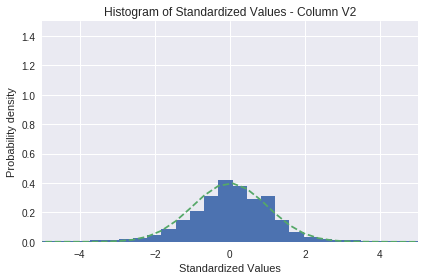

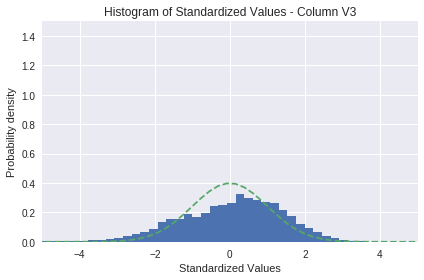

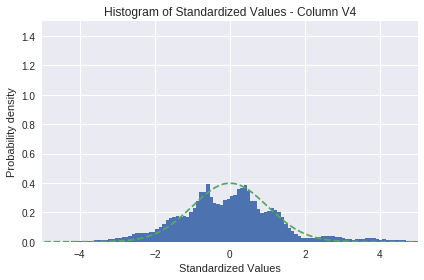

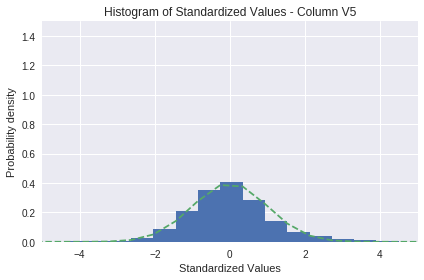

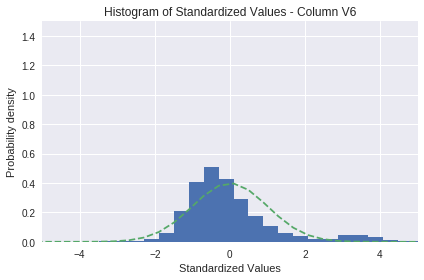

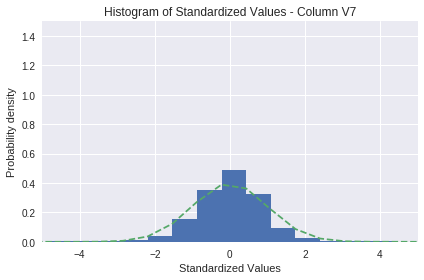

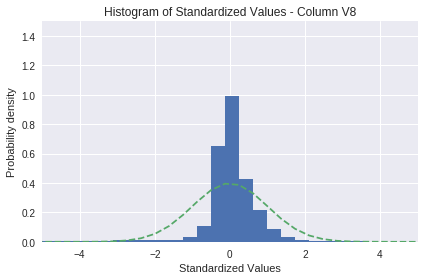

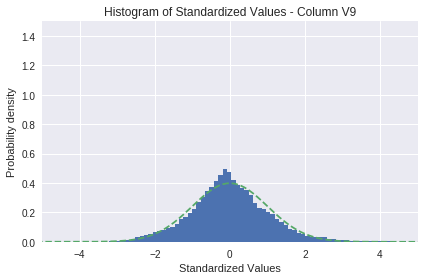

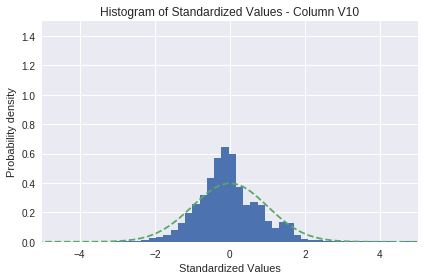

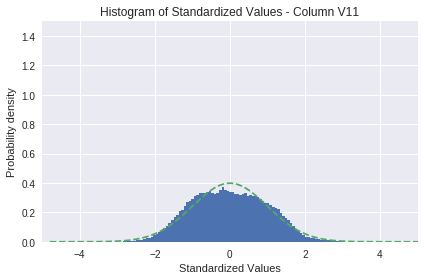

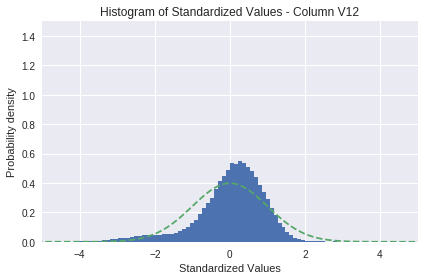

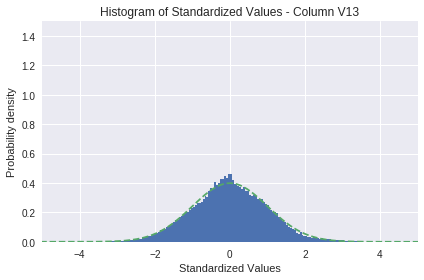

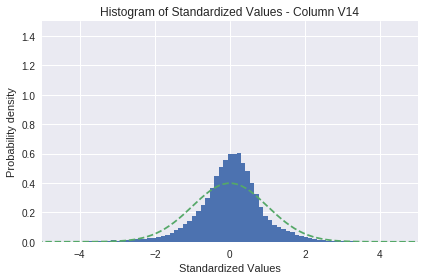

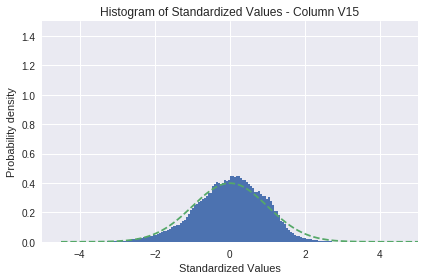

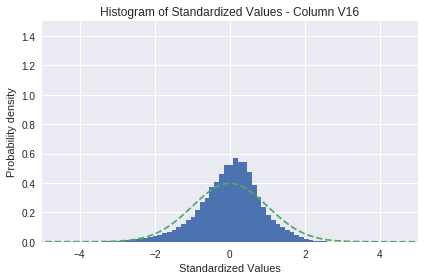

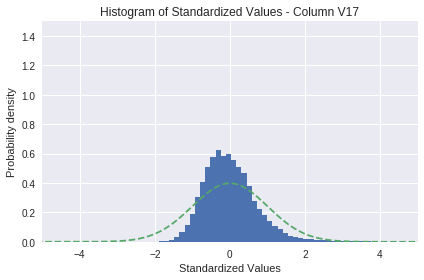

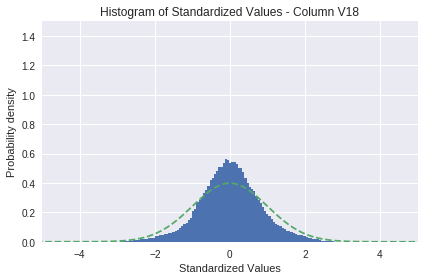

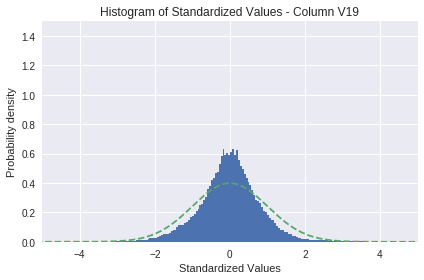

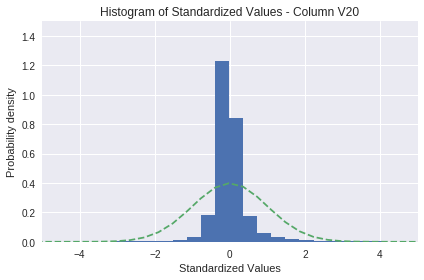

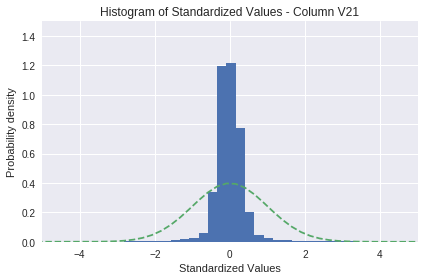

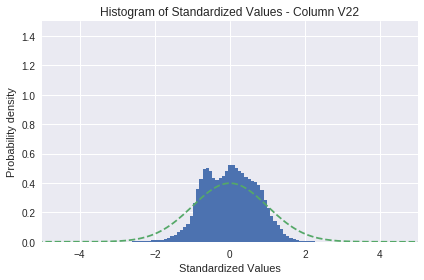

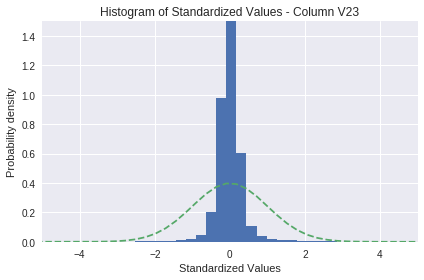

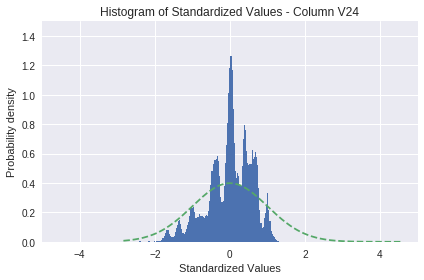

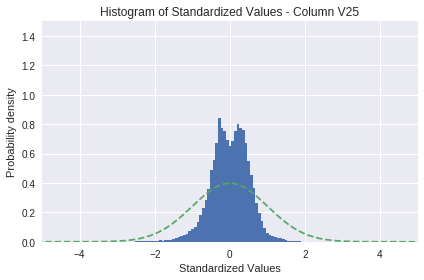

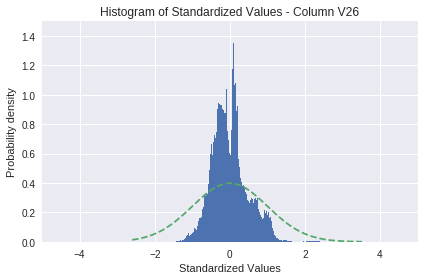

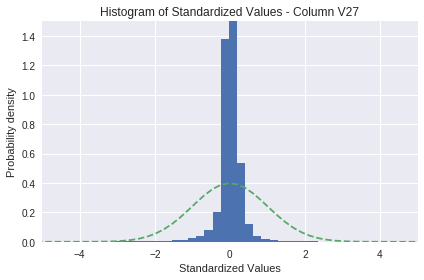

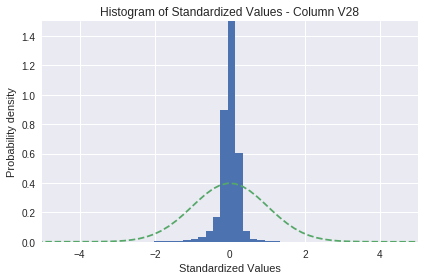

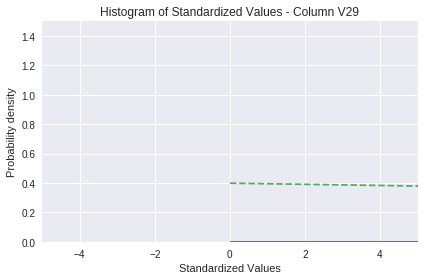

In [0]:
m,n=X.shape

for i in range(n):
  plotmydata(X.iloc[:,i],1,0,i)

### We will train on a keras Sequential model which is a simple NN with a linear stack of 4 hidden layers.

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback
from keras import backend as K
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

### The neural network selected has 4 hidden layers with $n^{[1]} = 16, n^{[2]} = 20, n^{[3]} = 20$, and $n^{[4]} = 18$ activation nodes moving from input to output. The initial random weights are set to uniform random values and a Dropout layer has been inserted in the middle of the hidden layers.

In [0]:
fraud_classifier = Sequential([
    Dense(units=16, kernel_initializer='uniform', input_dim=30, activation='relu'),
    Dense(units=20, kernel_initializer='uniform', activation='relu'),
    Dropout(0.5),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dense(18, kernel_initializer='uniform', activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

### Let's get a summary of the neural network...
 

In [0]:
fraud_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                340       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_14 (Dense)             (None, 18)                378       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 19        
Total params: 1,653
Trainable params: 1,653
Non-trainable params: 0
_________________________________________________________________


### We will compile the model using an ADAM optimizer. Cross-entropy loss, or log loss, measures the performance of a binary classification model. 


In [0]:
fraud_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We set up the callback which is a set of functions to be applied at given stages of the training procedure. We can use callbacks to get a view on internal states and statistics of the model during training. It writes a log for TensorBoard, which allows us to visualize dynamic graphs of our training and test metrics, as well as activation histograms for the different layers in our model.

In [0]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, # for tensorboard
          write_graph=True, write_images=True)

In [0]:
fraud_classifier.fit(X_train, y_train, batch_size=15, epochs=5, callbacks=[tbCallBack])

Epoch 1/5
256326/256326 [==============================] - 23s 90us/step - loss: 0.0084 - acc: 0.9989
Epoch 2/5
256326/256326 [==============================] - 23s 89us/step - loss: 0.0045 - acc: 0.9994
Epoch 3/5
256326/256326 [==============================] - 23s 88us/step - loss: 0.0039 - acc: 0.9993
Epoch 4/5
256326/256326 [==============================] - 23s 89us/step - loss: 0.0040 - acc: 0.9994
Epoch 5/5
256326/256326 [==============================] - 23s 89us/step - loss: 0.0036 - acc: 0.9994


### Now, let's try the model on the test set. First let's determine the ratio of positive values to the total number of instances in the test set.

In [0]:
test_pos = np.where(y_test == 1)
num_test_pos = len(test_pos[0])
test_neg = np.where(y_test ==0)
num_test_neg = len(test_neg[0])
print(num_test_pos,num_test_neg)

46 28435


### There are 46 positive instances.  Min accuracy needs to be 99.84%

In [0]:
score = fraud_classifier.evaluate(X_test, y_test, batch_size=128)
print(fraud_classifier.metrics_names)
print('\nAnd the Score is ', score[1] * 100, '%')

28481/28481 [==============================] - 0s 10us/step
['loss', 'acc']

And the Score is  99.92275552122467 %


### Let's calculate the F1 score for the test set

### Recall that $F1 = 2\frac{precision * recall}{precision + recall}$

In [0]:
from sklearn.metrics import f1_score

y_pred = fraud_classifier.predict(X_test)  # A numpy array, the target variable y_test is a pandas DataFrame
y_pred = np.int8(y_pred)
y_test_np = y_test.values
f1_score(y_pred,y_test_np,average='weighted', labels=np.unique(y_pred))

0.9991917914119054

### The F1 score is almost 1, which tells us that our fraud classifier model has almost perfect precision and recall!